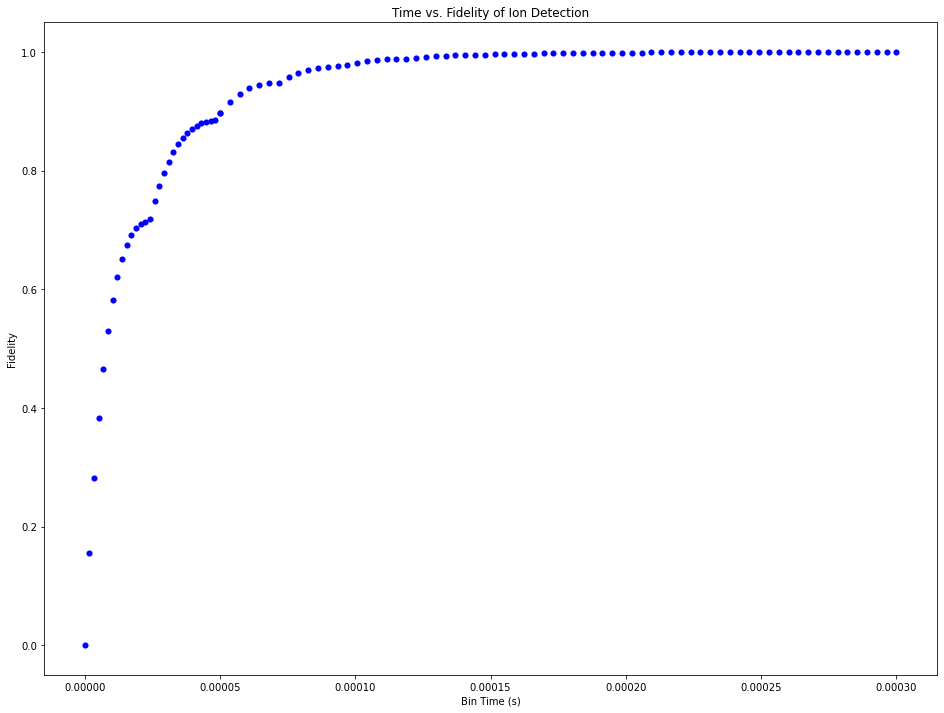

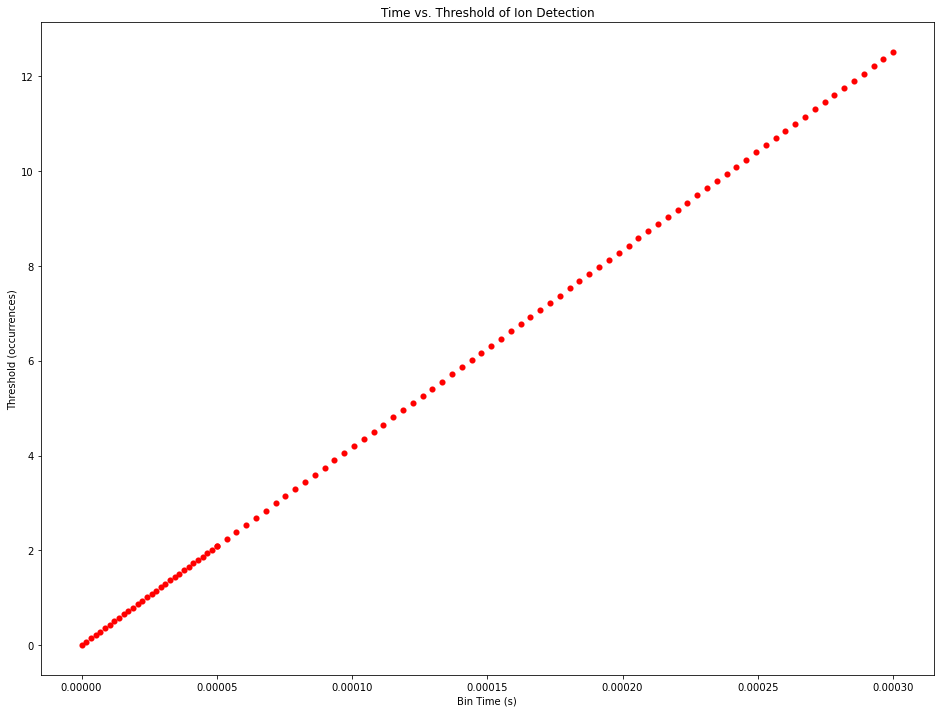

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson

bin_times = np.linspace(0, 0.00005, 30)
bin_times = np.append(bin_times, np.linspace(0.00005, 300000e-9, 70))
fidelities = np.array([])
thresholds = np.array([])
fidelity_time_dict = {}
thresh_time_dict = {}

R_B = float(1e5) # count rate of bright spots
R_D = float(1e4) # count rate of dark spots
 

for bin_time in bin_times:
    lambda_mean_R_B = (R_B + R_D) * bin_time # mean of poisson distribution, probability of bright spot
    lambda_mean_R_D = R_D * bin_time         # mean of poisson distribution, probability of dark spot
    
    # threshold for considering bright state and dark state (ie. n >= thresh is bright n < thresh is dark)
    threshold = (R_B * bin_time) / math.log(1.0 + (R_B / R_D)) 
    # Portions of graph that overlap at the threshold value are calculated
    discrim_B = poisson.cdf(k = threshold, mu = lambda_mean_R_B)
    discrim_D = 1.0 - poisson.cdf(k = threshold, mu = lambda_mean_R_D)
    
    fidelity = 1.0 - (discrim_B + discrim_D) # fidelity is 1 - total discrimination error
    fidelities = np.append(fidelities, fidelity) # add new value to array
    thresholds = np.append(thresholds, threshold) 
    
    # add rounded values to dictionaries
    fidelity_time_dict[str(fidelity)] = bin_time
    thresh_time_dict[str(threshold)] = bin_time

"""
Plotting fidelity and threshold vs time
"""
# plotting fidelity
plt.figure(figsize = (16, 12))
plt.scatter(bin_times, fidelities, c = 'blue', linewidths = 0.1) 
plt.ylabel("Fidelity")
plt.xlabel("Bin Time (s)")
plt.title("Time vs. Fidelity of Ion Detection")

# plotting threshold
plt.figure(figsize = (16, 12))
plt.scatter(bin_times, thresholds, c = 'red', linewidths = 0.1) 
plt.ylabel("Threshold (occurrences)")
plt.xlabel("Bin Time (s)")
plt.title("Time vs. Threshold of Ion Detection")

plt.show()


new_attempt = True
while (new_attempt == True): # loops however many times user wants to obtain new bin time
    input_fidelity = input("Enter input fidelity or press enter: ")
    # input_thresh = input("Enter input threshold or press enter: ")

    min_fidelity_diff = 100.0 # beginning value for minimum fidelity difference to be overwritten
    return_fidelity = "0.0"

    for fidelity in fidelity_time_dict.keys(): # finds the value in dictionary closest to the value entered

        input_vs_calculated_diff = abs(float(input_fidelity) - float(fidelity)) # stores difference between inputted value and calculated value
        temp_diff = min_fidelity_diff # stores old minimum to be compared to new minimum
        min_fidelity_diff = abs(min(input_vs_calculated_diff, min_fidelity_diff)) # compares diffs from previous value and current value

        if (temp_diff != min_fidelity_diff): # if the old minimum not the same as current minimum
            return_fidelity = fidelity # if new minimum error between input and calculated is found, store this as return value

    return_time = fidelity_time_dict.get(return_fidelity) # gets given value of fidelity -> time dictionary to return


    print("Bin time for " + str(input_fidelity) + " fidelity is: " + str(return_time))
    
    # asks if user wants to input new value, y indicates yes, otherwise end running 
    ask_new = input("New bin time? (y/n): ")
    if (ask_new != "y"):
        new_attempt = False 
        
